In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Experiment 3

In [47]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime","Min Time", "Max Time","Time"])
path = "../results/exp3"
graphs = os.listdir(path)
for  graph in graphs:
    new_path = os.path.join(path,graph)
    res = os.listdir(new_path)
    for i in res:
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        max_time  = max([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        min_time  = min([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        time = df.iloc[len(df)-1]["TotalTime"]
        
        n1,n2, qid,degree = df.iloc[0]["N1"],df.iloc[0]["N2"],df.iloc[0]['QID'],df.iloc[0]["Degree"]
        overtime = 1 if df['Overtime'][:-1].any() == 1 else 0
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,int(i.split(".")[0]),100,degree,overtime,min_time,max_time,time]
        #print(i,len(df))
    

In [48]:
final_df.to_csv('../results/processed/exp3.csv')

In [3]:
df = pd.read_csv('../results/processed/exp3.csv',index_col=0)
time = [float(i.replace(",",""))/1000000 for i in df['Time']] 
df['Time'] = time

In [4]:
df = df[df['graph'].isin(['amazon_q','ego-facebook','government'])]

In [8]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)


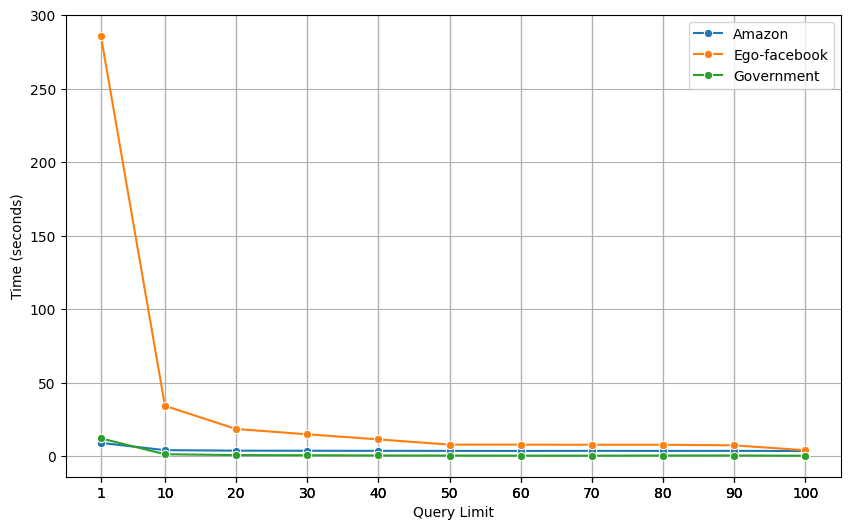

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Query Limit', y='Time', hue='graph', marker='o')
#plt.yscale('log')
#plt.title('Effect of Query Limit')
plt.xlabel('Query Limit')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.xticks(df['Query Limit'])
plt.savefig("../plots/limitqueries.png")
#plt.show()

In [7]:
plt.savefig("../plots/limitqueries.png")

<Figure size 640x480 with 0 Axes>

# Experiment 5

In [77]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","core Value", "Query Limit","Total Queries", "Degree","Overtime","Min Time", "Max Time","Time"])
path = "../results/exp5"
graphs = os.listdir(path)
for  graph in graphs:
    new_path = os.path.join(path,graph)
    res = os.listdir(new_path)
    for i in res:
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        max_time  = max([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        min_time  = min([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        time = df.iloc[len(df)-1]["TotalTime"]
        
        n1,n2, qid,degree = df.iloc[0]["N1"],df.iloc[0]["N2"],df.iloc[0]['QID'],df.iloc[0]["Degree"]
        overtime = 1 if df['Overtime'][:-1].any() == 1 else 0
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,int(i.split(".")[0]),100,100,degree,overtime,min_time,max_time,time]
        #print(i,len(df))
    

In [78]:
final_df.to_csv("../results/processed/exp5.csv")

In [10]:
df = pd.read_csv('../results/processed/exp5.csv',index_col=0)
time = [float(i.replace(",",""))/1000000 for i in df['Time']] 
df['Time'] = time

In [11]:
df = df[df['graph'].isin(['orani','ego-facebook','government'])]

In [14]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)


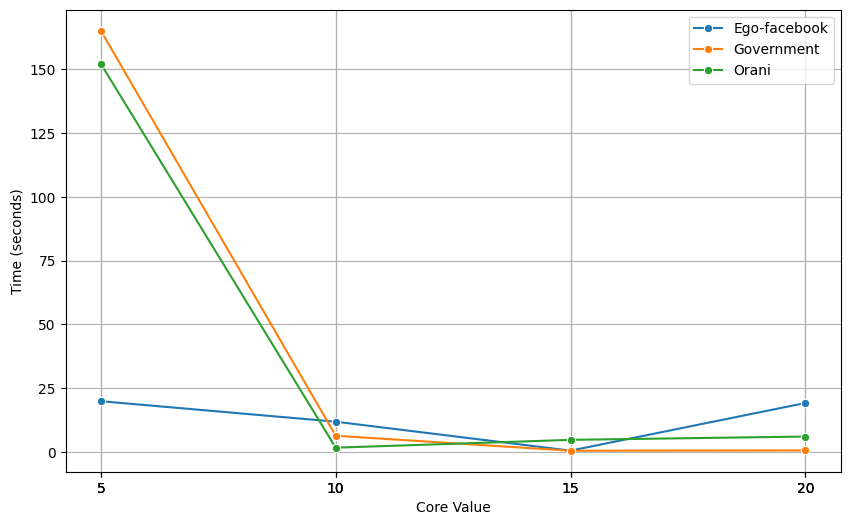

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='core Value', y='Time', hue='graph', marker='o')
#plt.yscale('log')
#plt.title('Effect of Core Value')
plt.xlabel('Core Value')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.xticks(df['core Value'])
plt.savefig("../plots/coreValue.png")
#plt.show()

# Experiment 6

In [4]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID", "Query Limit","Total Queries", "Degree","Overtime","Min Time", "Max Time","Time"])
path = "../results/exp6/l"
graphs = os.listdir(path)
for  graph in graphs:
    new_path = os.path.join(path,graph)
    res = os.listdir(new_path)
    for i in res:
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        df['Time'] = df['Time'].astype("str")
        max_time  = max([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        min_time  = min([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        time = df.iloc[len(df)-1]["TotalTime"]
        
        n1,n2, qid,degree = df.iloc[0]["N1"],df.iloc[0]["N2"],df.iloc[0]['QID'],df.iloc[0]["Degree"]
        overtime = 1 if df['Overtime'][:-1].any() == 1 else 0
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,100,100,degree,overtime,min_time,max_time,time]
        #print(i,len(df))
    

In [5]:
final_df.head()

,graph,N1,N2,QID,Query Limit,Total Queries,Degree,Overtime,Min Time,Max Time,Time
0,amazon_q,12,21,238357,100,100,1,0,199,956,"58,813"
1,amazon_q,15,21,238357,100,100,1,0,198,947,"59,305"
2,amazon_q,18,21,238357,100,100,1,0,197,964,"45,854"
3,amazon_q,3,21,238357,100,100,1,0,200,954,"47,650"
4,amazon_q,6,21,238357,100,100,1,0,200,951,"81,943"


In [6]:
final_df.to_csv("../results/processed/exp6_l.csv")

In [16]:
df = pd.read_csv('../results/processed/exp6_l.csv',index_col=0)
time = [float(i.replace(",",""))/1000000 for i in df['Time']] 
df['Time'] = time

In [17]:
df = df[df['graph'].isin(['orani','ego-facebook','government'])]

In [18]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)

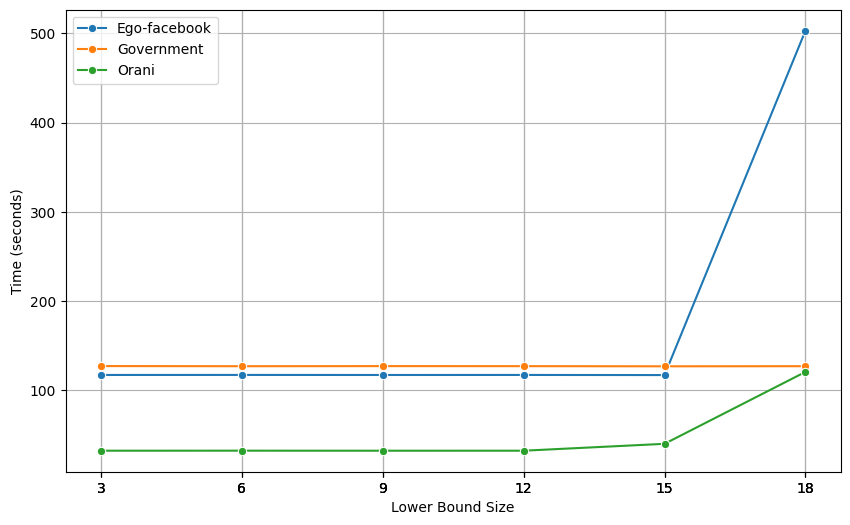

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='N1', y='Time', hue='graph', marker='o')
#plt.yscale('log')
#plt.title('l VS Time')
plt.xlabel('Lower Bound Size')
plt.ylabel('Time (seconds)')
#plt.yscale("log")
plt.grid(True)
plt.legend()
plt.xticks(df['N1'])
plt.savefig("../plots/l.png")
#plt.show()

In [46]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID", "Query Limit","Total Queries", "Degree","Overtime","Min Time", "Max Time","Time"])
path = "../results/exp6/h"
graphs = os.listdir(path)
for  graph in graphs:
    new_path = os.path.join(path,graph)
    res = os.listdir(new_path)
    for i in res:
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        df['Time'] = df['Time'].astype("str")
        max_time  = max([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        min_time  = min([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        time = df.iloc[len(df)-1]["TotalTime"]
        
        n1,n2, qid,degree = df.iloc[0]["N1"],df.iloc[0]["N2"],df.iloc[0]['QID'],df.iloc[0]["Degree"]
        overtime = 1 if df['Overtime'][:-1].any() == 1 else 0
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,100,100,degree,overtime,min_time,max_time,time]
        #print(i,len(df))
    

In [51]:
final_df.head()

,graph,N1,N2,QID,Query Limit,Total Queries,Degree,Overtime,Min Time,Max Time,Time
0,amazon_q,3,12,238357,100,100,1,0,154,842,"65,186"
1,amazon_q,3,15,238357,100,100,1,0,165,858,"187,323"
2,amazon_q,3,18,238357,100,100,1,0,185,895,"57,207"
3,amazon_q,3,21,238357,100,100,1,0,201,963,"59,206"
4,amazon_q,3,6,238357,100,100,1,0,133,803,"40,921"


In [47]:
final_df.to_csv("../results/processed/exp6_h.csv")

In [25]:
df = pd.read_csv('../results/processed/exp6_h.csv',index_col=0)
time = [float(i.replace(",",""))/1000000 for i in df['Time']] 
df['Time'] = time

In [26]:
df = df[df['graph'].isin(['orani','ego-facebook','government'])]

In [27]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)

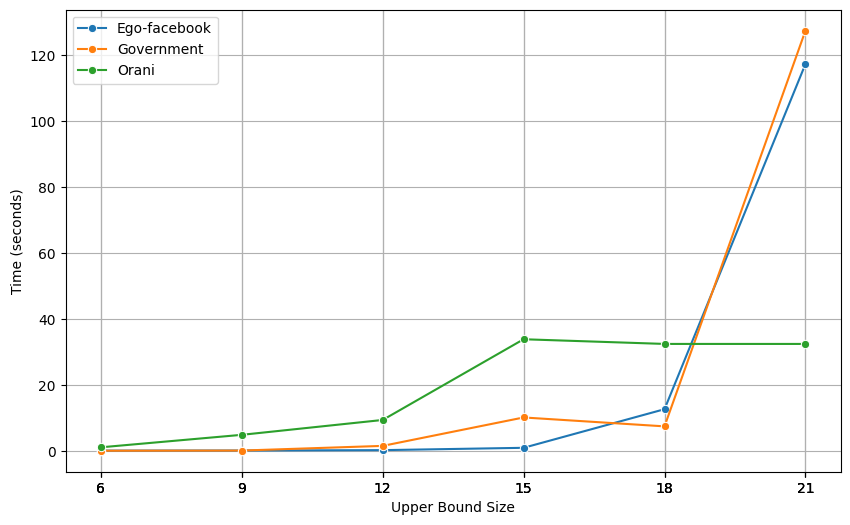

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='N2', y='Time', hue='graph', marker='o')
#plt.yscale('log')
#plt.title('h VS Time')
plt.xlabel('Upper Bound Size')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.xticks(df['N2'])
plt.savefig("../plots/h.png")
#plt.show()

# Experiment 7

In [59]:
path = "../results/exp7/"
graphs = os.listdir(path)
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime /R1","Time /R1","Overtime /R2","Time /R2","Overtime /R3","Time /R3","Overtime all","Time all"])
for graph in graphs:
    row = [graph]
    new_path = os.path.join(path,graph)
    for j in ['r1.txt','r2.txt','r3.txt','all.txt']:
        df = pd.read_csv(os.path.join(new_path,j),sep="|")
        time  = df.iloc[len(df)-1]["TotalTime"]
        overtime = 0 if (df['Overtime'][:-1]==0).all() else 1
        if j == "r1.txt":
            row += [df.iloc[0]["N1"], df.iloc[0]["N2"], df.iloc[0]["QID"],100,100,df.iloc[0]["Degree"],overtime,time]
        else:
            row += [overtime,time]
    final_df.loc[len(final_df)] = row

In [62]:
final_df.to_csv("../results/processed/exp7.csv")

In [43]:
df = pd.read_csv("../results/processed/exp7.csv",index_col=0)
df["Time /R1"] = [float(i.replace(",",""))/(1000000) for i in df["Time /R1"]]
df["Time /R2"] = [float(i.replace(",",""))/(1000000) for i in df["Time /R2"]]
df["Time /R3"] = [float(i.replace(",",""))/(1000000) for i in df["Time /R3"]]
df["Time all"] = [float(i.replace(",",""))/(1000000) for i in df["Time all"]]

In [44]:
df = df[df['graph'].isin(['amazon_q','ego-facebook','government'])]

In [45]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)

In [93]:
df['graph'].unique()

array(['amazon_q', 'ego-facebook', 'government'], dtype=object)

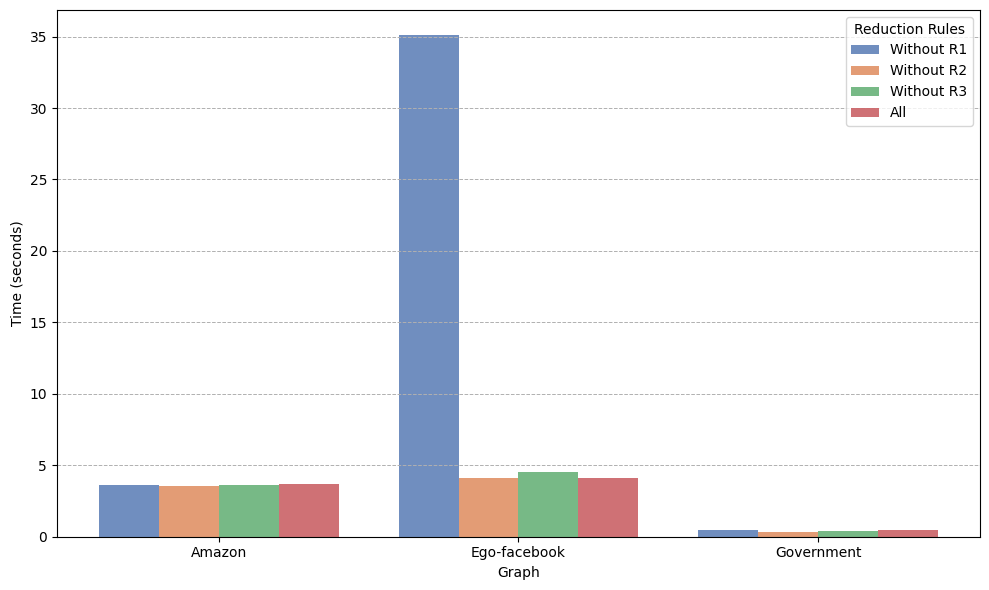

In [46]:
plt.figure(figsize=(10, 6))

columns = ['Time /R1', 'Time /R2', 'Time /R3', 'Time all']
labels = ["Without R1", "Without R2", "Without R3", "All"]
palette = sns.color_palette("deep", len(columns))
bar_width = 0.2  # Adjust the width of each bar
x = np.arange(len(df['graph']))  # the label locations

for i, col in enumerate(columns):  
    plt.bar(x + i * bar_width, df[col], width=bar_width, label=labels[i], color=palette[i], alpha=0.8)

plt.xticks(x + bar_width * 1.5, df['graph'])  # Centering the tick labels
#plt.yscale('log')

plt.xlabel('Graph')
plt.ylabel('Time (seconds)')
#plt.title('Effect of Reduction Rules')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend(title="Reduction Rules")
plt.tight_layout()
plt.savefig("../plots/reductionRules.png")
plt.show()


# Experiment 8

In [79]:
path = "../results/exp8/"
graphs = os.listdir(path)
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime /p1","Time /p1","Overtime /p2","Time /p2","Overtime all","Time all"])
for graph in graphs:
    row = [graph]
    new_path = os.path.join(path,graph)
    for j in ['p1.txt','p2.txt','all.txt']:
        df = pd.read_csv(os.path.join(new_path,j),sep="|")
        time  = df.iloc[len(df)-1]["TotalTime"]
        overtime = 0 if (df['Overtime'][:-1]==0).all() else 1
        if j == "p1.txt":
            row += [df.iloc[0]["N1"], df.iloc[0]["N2"], df.iloc[0]["QID"],100,100,df.iloc[0]["Degree"],overtime,time]
        else:
            row += [overtime,time]
    final_df.loc[len(final_df)] = row

In [88]:
final_df.to_csv("../results/processed/exp8.csv")

In [47]:
df = pd.read_csv("../results/processed/exp8.csv",index_col=0)
df["Time /p1"] = [float(i.replace(",",""))/1000000 for i in df["Time /p1"]]
df["Time /p2"] = [float(i.replace(",",""))/1000000 for i in df["Time /p2"]]
df["Time all"] = [float(i.replace(",",""))/1000000 for i in df["Time all"]]

In [48]:
df = df[df['graph'].isin(['amazon_q','ego-facebook','government'])]

In [49]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)

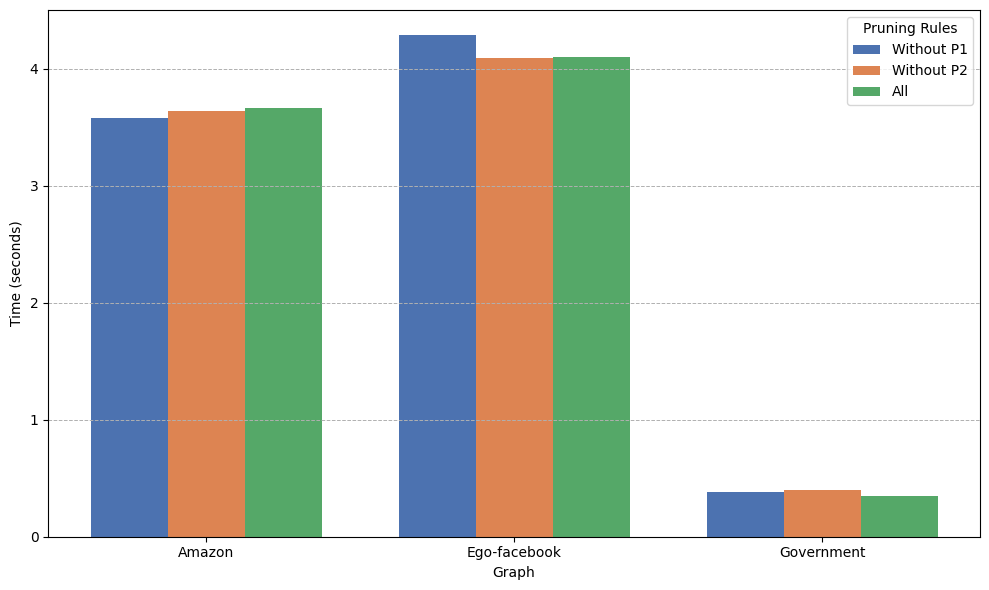

In [50]:
plt.figure(figsize=(10, 6))

columns = ['Time /p1', 'Time /p2', 'Time all']
labels = ["Without P1", "Without P2", "All"]
palette = sns.color_palette("deep", len(columns))
bar_width = 0.25  # Width of each bar
x = np.arange(len(df['graph']))  # the label locations

for i, col in enumerate(columns):
    plt.bar(x + i * bar_width, df[col], width=bar_width, label=labels[i], color=palette[i], alpha=1)

plt.xticks(x + bar_width, df['graph'])  # Centering the tick labels
#plt.yscale('log')

plt.xlabel('Graph')
plt.ylabel('Time (seconds)')
#plt.title('Effect of Branch Pruning')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend(title="Pruning Rules")
plt.tight_layout()
plt.savefig("../plots/branchPruning.png")


# Experiment 9

In [71]:
path = "../results/exp9/"
graphs = os.listdir(path)
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime next","Time next","Overtime jump","Time jump","Overtime numtask","Time numtask","Overtime space","Time space"])
for graph in graphs:
    row = [graph]
    new_path = os.path.join(path,graph)
    for j in ['next.txt','jump.txt','numTask.txt','space.txt']:
        df = pd.read_csv(os.path.join(new_path,j),sep="|")
        time  = df.iloc[len(df)-1]["TotalTime"]
        overtime = 0 if (df['Overtime'][:-1]==0).all() else 1
        if j == "next.txt":
            row += [df.iloc[0]["N1"], df.iloc[0]["N2"], df.iloc[0]["QID"],100,100,df.iloc[0]["Degree"],overtime,time]
        else:
            row += [overtime,time]
    final_df.loc[len(final_df)] = row

In [74]:
final_df.to_csv("../results/processed/exp9.csv")

In [37]:
df = pd.read_csv("../results/processed/exp9.csv",index_col=0)
df["Time next"] = [float(i.replace(",",""))/1000000 for i in df["Time next"]]
df["Time jump"] = [float(i.replace(",",""))/1000000 for i in df["Time jump"]]
df["Time numtask"] = [float(i.replace(",",""))/1000000 for i in df["Time numtask"]]
df["Time space"] = [float(i.replace(",",""))/1000000 for i in df["Time space"]]


In [38]:
df = df[df['graph'].isin(['amazon_q','ego-facebook','government'])]

In [39]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)

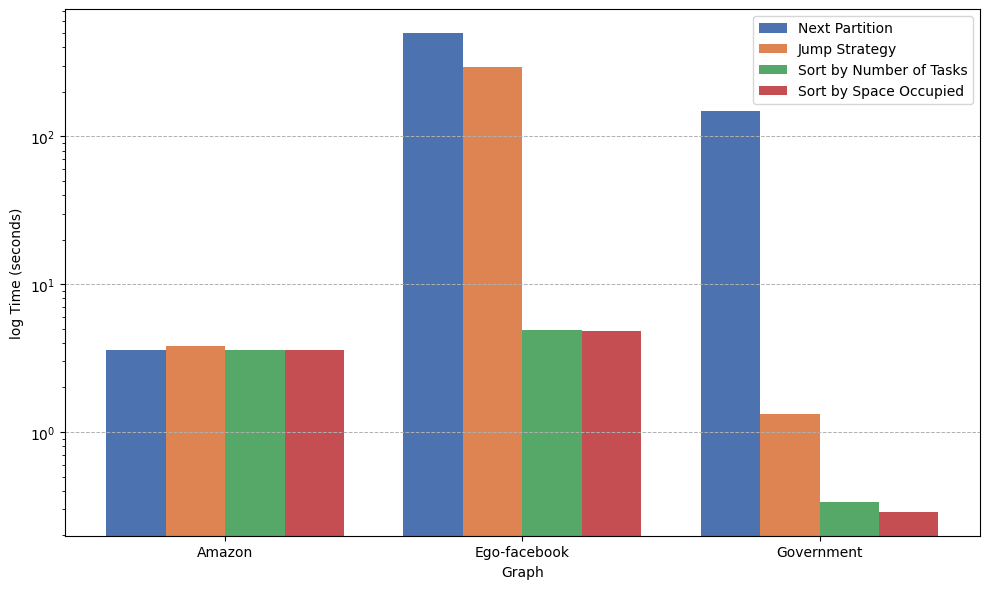

In [40]:
plt.figure(figsize=(10, 6))

columns = ['Time next', 'Time jump', 'Time numtask', 'Time space']
labels = ["Next Partition", "Jump Strategy", "Sort by Number of Tasks", "Sort by Space Occupied"]
palette = sns.color_palette("deep", len(columns))
bar_width = 0.2  # Width of each bar (smaller to fit 4 bars without overlap)
x = np.arange(len(df['graph']))  # the label locations

# Loop to plot each column with adjusted x positions
for i, col in enumerate(columns):
    plt.bar(x + i * bar_width - (1.5 * bar_width), df[col], width=bar_width, label=labels[i], color=palette[i], alpha=1)

# Center the x-ticks
plt.xticks(x, df['graph'])

# Set labels and title
plt.xlabel('Graph')
plt.ylabel('log Time (seconds)')
plt.yscale('log')
#plt.title('Task Management Strategies')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("../plots/taskManagement.png")


# Old

In [2]:
path ='C:/Users/18565/Desktop/results/CPU/rand'

In [3]:
c  = """gowalla
citeseer
com-dblp
amazon_q
youtube_q
hyves_q
skitter
flixster
patent_q
soc-livejournal
dblp-author"""

In [4]:
file_list = c.split("\n")

In [5]:
import os

In [6]:
os.getcwd()

'c:\\Users\\18565\\Desktop\\Research Internship\\my cuda code\\SCS\\python'

In [7]:
len(file_list)

11

In [8]:
df = pd.DataFrame()
for filename in file_list:
    temp = pd.read_csv(os.path.join(path,filename),sep="|")
    temp['Graph'] = [filename]*len(temp)
    if (type(temp['Time'][0]) == np.int64):
        print(filename,sum(temp['Time']))
    else:
        print(filename,sum([int(i.replace(",","")) for i in temp['Time'].values]))
    df = pd.concat((df,temp))

gowalla 1805691811
citeseer 253078560
com-dblp 1801409175
amazon_q 33066455
youtube_q 3604607295
hyves_q 1804120553
skitter 12815176
flixster 8841121
patent_q 7229427420
soc-livejournal 63065527
dblp-author 1838411846


In [9]:
df.to_csv("../results/processed/19_30_rand_results.csv",index=False)

In [10]:
path = "../client/query/rand"
for i in df['Graph'].unique():
    temp = df[df["Graph"]== i]
    with open(os.path.join(path,i),"w") as file:
        for j in temp.iterrows():
            line =  " ".join(list(map(str,j[1][0:3])) + ["1","1"])+"\n"
            file.write(line)
        file.write("server_exit")
    print(i)

gowalla
citeseer
com-dblp
amazon_q
youtube_q
hyves_q
skitter
flixster
patent_q
soc-livejournal
dblp-author


In [38]:
i

'graph7'

In [33]:
os.getcwd()

'c:\\Users\\18565\\Desktop\\Research Internship\\my cuda code\\SCS\\python'

'3 6 3 1 1'

In [49]:
sum([int(i.replace(",","")) for i in temp['Time'].values])

2575516269

In [33]:
x =  

In [14]:
df1 = pd.read_csv(os.path.join(path,file_list[1]),sep="|")
df1['Graph'] = [file_list[1]]*len(df1)

In [17]:
pd.concat((df,df1))

,N1,N2,QID,Time,Degree,Overtime,Heu,Graph
0,3,6,97,"2,113",3,0,0,100.txt
1,6,9,96,"2,809",3,0,0,100.txt
2,9,12,95,"16,679",3,0,0,100.txt
3,12,15,94,"50,946",3,0,0,100.txt
4,15,18,93,"228,876",3,0,0,100.txt
5,18,21,92,"1,569,059",3,0,0,100.txt
6,21,24,91,"4,117,864",3,0,0,100.txt
0,3,6,5535,"15,447",5,0,1,astroPh
1,6,9,7777,"15,471",8,0,1,astroPh
2,9,12,6948,"15,411",11,0,1,astroPh


In [4]:
import os
import pandas as pd

In [ ]:
	Overtime

In [13]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime","Time",])
path = "../results/exp3"
graphs = os.listdir(path)
for  graph in graphs:
    new_path = os.path.join(path,graph)
    res = os.listdir(new_path)
    for i in res:
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        time  = max([int(i.replace(",","")) for i in list(df['Time'])])
        n1,n2, qid,_,degree, overtime,_ = list(df.iloc[0])
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,100,int(i.split(".")[0])-1,degree,overtime,time]
        print(i,len(df))
    

101.txt 100
11.txt 10
21.txt 20
31.txt 30
41.txt 40
51.txt 50
61.txt 60
71.txt 70
81.txt 80
91.txt 90
101.txt 100
11.txt 10
21.txt 20
31.txt 30
41.txt 40
51.txt 50
61.txt 60
71.txt 70
81.txt 80
91.txt 90
101.txt 100
11.txt 10
21.txt 20
31.txt 30
41.txt 40
51.txt 50
61.txt 60
71.txt 70
81.txt 80
91.txt 90
101.txt 100
11.txt 10
21.txt 20
31.txt 30
41.txt 40
51.txt 50
61.txt 60
71.txt 70
81.txt 80
91.txt 90
101.txt 100
11.txt 10
21.txt 20
31.txt 30
41.txt 40
51.txt 50
61.txt 60
71.txt 70
81.txt 80
91.txt 90


In [15]:
final_df.to_csv("../results/processed/exp3.csv")

In [64]:
n1,n2, qid,degree, overtime,

(9, 12, 1127, 9, 0)

In [2]:
import os
import pandas as pd

In [4]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Degree","Overtime","Time",])
path = "../results/exp5"
graphs = os.listdir(path)
for  graph in graphs:
    df = pd.read_csv(os.path.join(path,graph),sep="|")
    for n1,n2 in zip([3,6,9,12,15,18,21],[6,9,12,15,18,21,24]):
        try:
            temp = df[df['N1']==n1]
            qid = temp.iloc[0]["QID"]
            degree = temp.iloc[0]["Degree"]
            time =  max([int(i.replace(",","")) for i in temp['Time']])
            overtime = 0 if (temp['Overtime']==0).all() else 1
            final_df.loc[len(final_df)] = [graph,n1,n2,qid,10,degree,overtime,time]
        except:
            print(n1,graph)
            

18 amazon_q
21 amazon_q


In [5]:
final_df.to_csv("../results/processed/exp5.csv")

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
path = "../results/processed/exp3.csv"
df = pd.read_csv(path,index_col=0)
df["Time"] = df["Time"]/(1000000)


In [19]:
df.head()

,graph,N1,N2,QID,Query Limit,Total Queries,Degree,Overtime,Time
0,amazon_q,9,12,321,100,100,6,0,3.521930
1,amazon_q,9,12,321,100,10,6,0,0.370619
2,amazon_q,9,12,321,100,20,6,0,0.723140
3,amazon_q,9,12,321,100,30,6,0,1.067209
4,amazon_q,9,12,321,100,40,6,0,1.421537


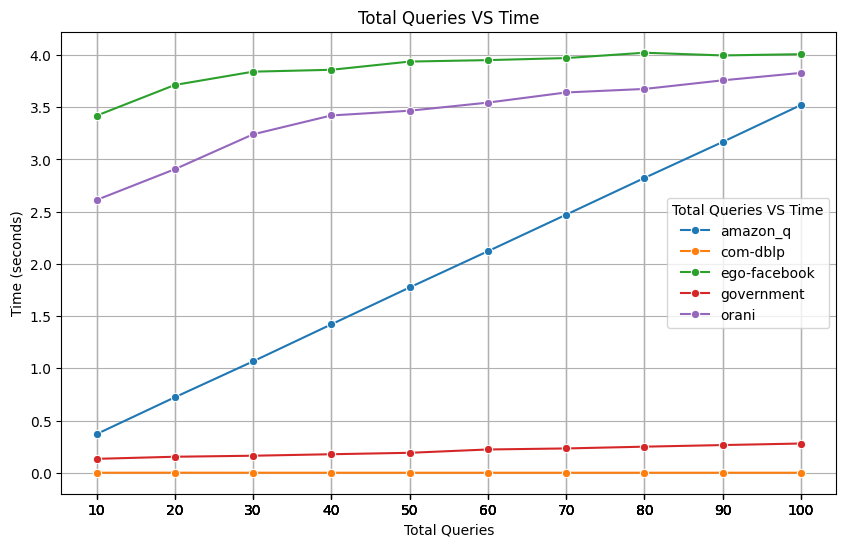

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Total Queries', y='Time', hue='graph', marker='o')
plt.title('Total Queries VS Time')
plt.xlabel('Total Queries')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend(title='Total Queries VS Time')
plt.xticks(df['Total Queries'])
plt.show()

In [2]:
import os
import pandas as pd

In [50]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime","Time",])
path = "../results/exp10"
graphs = os.listdir(path)
for  graph in graphs:
    new_path = os.path.join(path,graph)
    res = os.listdir(new_path)
    for i in res:
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        time  = [int(i.replace(",","")) for i in list(df['Time'])]
        total_time = 0
        for j in range(0,100,int(i.split(".")[0])):
            total_time += max(time[j:min(j+int(i.split(".")[0]),100)])
        n1,n2, qid,_,degree, overtime,_ = list(df.iloc[0])
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,int(i.split(".")[0]),100,degree,overtime,total_time]
        print(i,len(df))

1.txt 100
10.txt 100
100.txt 100
20.txt 100
30.txt 100
40.txt 100
50.txt 100
60.txt 100
70.txt 100
80.txt 100
90.txt 100
1.txt 100
10.txt 100
100.txt 100
20.txt 200
30.txt 100
40.txt 100
50.txt 100
60.txt 100
70.txt 100
80.txt 100
90.txt 100
1.txt 100
10.txt 100
100.txt 100
20.txt 100
30.txt 100
40.txt 100
50.txt 100
60.txt 100
70.txt 100
80.txt 100
90.txt 100
1.txt 100
10.txt 100
100.txt 100
20.txt 100
30.txt 100
40.txt 100
50.txt 100
60.txt 100
70.txt 100
80.txt 100
90.txt 100
1.txt 100
10.txt 100
100.txt 100
20.txt 100
30.txt 100
40.txt 100
50.txt 100
60.txt 100
70.txt 100
80.txt 100
90.txt 100


In [52]:
final_df.to_csv("../results/processed/exp10.csv")

In [53]:
path = "../results/processed/exp10.csv"
df = pd.read_csv(path,index_col=0)
df["Time"] = df["Time"]/(1000000)


In [54]:
df.head()

,graph,N1,N2,QID,Query Limit,Total Queries,Degree,Overtime,Time
0,amazon_q,9,12,321,1,100,6,0,9.071827
1,amazon_q,9,12,321,10,100,6,0,4.085286
2,amazon_q,9,12,321,100,100,6,0,3.597806
3,amazon_q,9,12,321,20,100,6,0,3.819173
4,amazon_q,9,12,321,30,100,6,0,3.758131


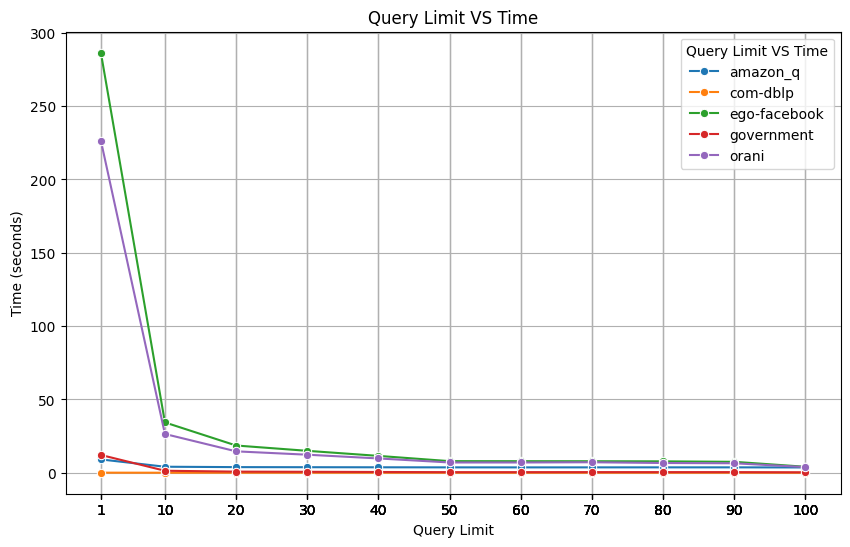

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Query Limit', y='Time', hue='graph', marker='o')
plt.title('Query Limit VS Time')
plt.xlabel('Query Limit')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend(title='Query Limit VS Time')
plt.xticks(df['Query Limit'])
plt.show()

In [50]:
import os
import pandas as pd
path = "../results/exp6/"
files = os.listdir(os.path.join(path,"r3"))
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime /r1","Time /r1","Overtime /r2","Time /r2","Overtime /r3","Time /r3","Overtime all","Time all"])
for i in files:
    row = [i]
    for j in ['r1','r2','r3','all']:
        new_path = os.path.join(path,j)
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        time  = max([int(i.replace(",","")) for i in list(df['Time'])])
        overtime = 0 if (df['Overtime']==0).all() else 1
        if j == "r1":
            row += [df.iloc[0]["N1"], df.iloc[0]["N2"], df.iloc[0]["QID"],10,10,df.iloc[0]["Degree"],overtime,time]
        else:
            row += [df.iloc[0]["Overtime"],int(df.iloc[0]["Time"].replace(",",""))]
    final_df.loc[len(final_df)] = row

In [51]:
final_df.to_csv("../results/processed/exp6.csv")

In [42]:
df = pd.read_csv("../results/processed/exp6.csv",index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '../results/processed/exp6.csv'

In [55]:
df

,graph,N1,N2,QID,Query Limit,Total Queries,Degree,Overtime /r1,Time /r1,Overtime /r2,Time /r2,Overtime /r3,Time /r3,Overtime all,Time all
0,amazon_q,9,12,321,10,10,6,0,370672,0,414651,0,471311,0,367788
1,com-dblp,9,12,79920,10,10,11,0,1469,0,1521,0,1406,0,1415
2,ego-facebook,9,12,1127,10,10,9,0,26930420,0,3423229,0,3792629,0,3423336
3,government,9,12,6876,10,10,8,0,175503,0,135550,0,153494,0,135992
4,orani,9,12,1452,10,10,9,0,513620114,0,2640483,0,4048530,0,2642391


In [56]:
df["Time /r1"] = df["Time /r1"]/(1000000)
df["Time /r2"] = df["Time /r2"]/(1000000)
df["Time /r3"] = df["Time /r3"]/(1000000)
df["Time all"] = df["Time all"]/(1000000)

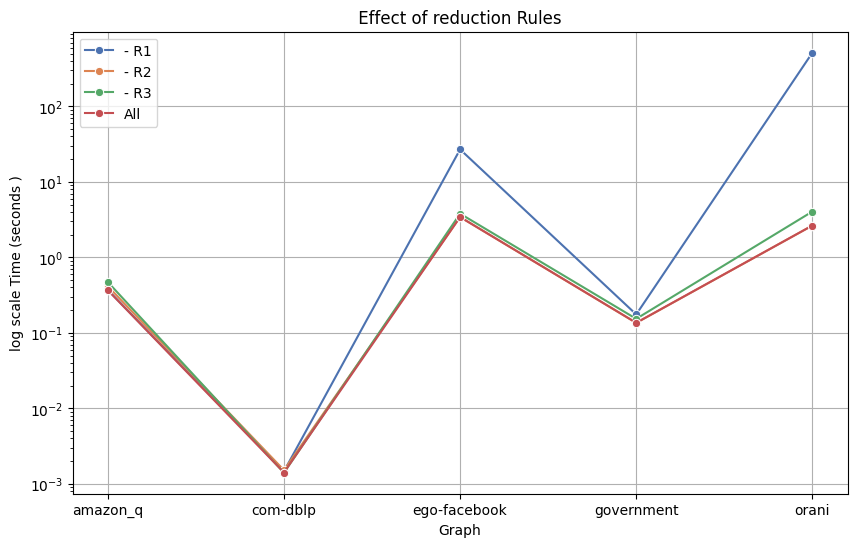

In [ ]:
df["Time /r1"] = df["Time /r1"]/(1000000)
df["Time /r2"] = df["Time /r2"]/(1000000)
df["Time /r3"] = df["Time /r3"]/(1000000)
df["Time all"] = df["Time all"]/(1000000)

plt.figure(figsize=(10, 6))

columns = ['Time /r1', 'Time /r2', 'Time /r3','Time all']
labels = ["- R1", "- R2", "- R3", "All"]
palette = sns.color_palette("deep", len(columns))

for i, col in enumerate(columns):  # Skip the first column 'X'
    sns.lineplot(x=df['graph'], y=df[col], label=labels[i], color=palette[i], marker='o')
plt.yscale('log')
plt.xlabel('Graph')
plt.ylabel('log scale Time (seconds )')
plt.title(' Effect of reduction Rules ')
plt.grid(True)
plt.show()


In [68]:
import os
import pandas as pd
path = "../results/exp7/"
files = os.listdir(os.path.join(path,"all"))
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime /p1","Time /p1","Overtime /p2","Time /p2","Overtime all","Time all"])
for i in files:
    row = [i]
    for j in ['p1','p2','all']:
        new_path = os.path.join(path,j)
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        time  = max([int(i.replace(",","")) for i in list(df['Time'])])
        overtime = 0 if (df['Overtime']==0).all() else 1
        if j == "p1":
            row += [df.iloc[0]["N1"], df.iloc[0]["N2"], df.iloc[0]["QID"],10,10,df.iloc[0]["Degree"],overtime,time]
        else:
            row += [df.iloc[0]["Overtime"],int(df.iloc[0]["Time"].replace(",",""))]
    final_df.loc[len(final_df)] = row

In [69]:
final_df

,graph,N1,N2,QID,Query Limit,Total Queries,Degree,Overtime /p1,Time /p1,Overtime /p2,Time /p2,Overtime all,Time all
0,amazon_q,9,12,321,10,10,6,0,419546,0,417569,0,416036
1,com-dblp,9,12,79920,10,10,11,0,1327,0,1246,0,1426
2,ego-facebook,9,12,1127,10,10,9,0,3538243,0,3426140,0,3422796
3,government,9,12,6876,10,10,8,0,136055,0,135505,0,135860
4,orani,9,12,1452,10,10,9,0,14495909,0,2637204,0,2640964


In [70]:
final_df.to_csv("../results/processed/exp7.csv")

In [71]:
df = pd.read_csv("../results/processed/exp7.csv",index_col=0)

In [73]:
df["Time /p1"] = df["Time /p1"]/(1000000)
df["Time /p2"] = df["Time /p2"]/(1000000)
df["Time all"] = df["Time all"]/(1000000)

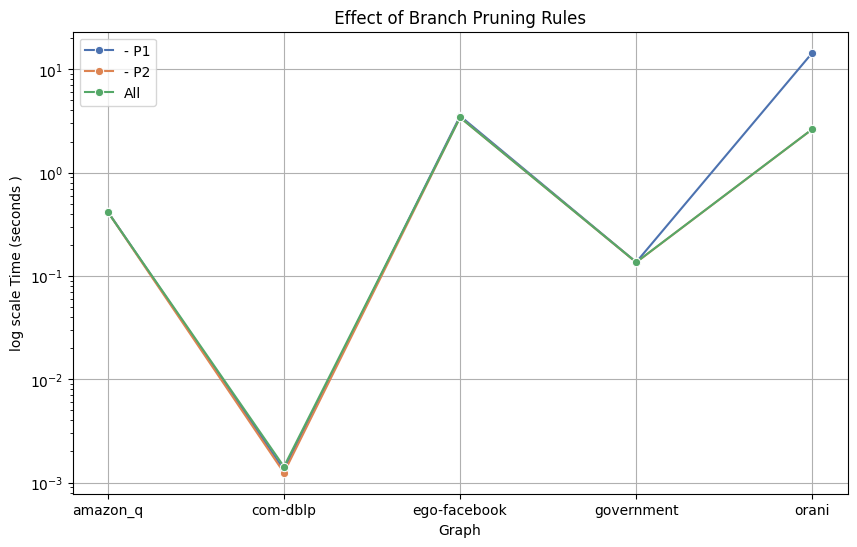

In [ ]:
df["Time /p1"] = df["Time /p1"]/(1000000)
df["Time /p2"] = df["Time /p2"]/(1000000)
df["Time all"] = df["Time all"]/(1000000)

plt.figure(figsize=(10, 6))

columns = ['Time /p1', 'Time /p2','Time all']
labels = ["- P1", "- P2", "All"]
palette = sns.color_palette("deep", len(columns))

for i, col in enumerate(columns):  # Skip the first column 'X'
    sns.lineplot(x=df['graph'], y=df[col], label=labels[i], color=palette[i], marker='o')
plt.yscale('log')
plt.xlabel('Graph')
plt.ylabel('log scale Time (seconds )')
plt.title(' Effect of Branch Pruning Rules ')
plt.grid(True)
plt.show()
